In [ ]:
pip install pandas numpy seaborn matplotlib scikit-learn


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2025-10-20 10:44:28.152528: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## **Example 1**: Binary Classification with NN (Banknote Authentication)
![](https://www.neuraldesigner.com/images/banknote-authentication.webp)
[Image Source](https://www.neuraldesigner.com/blog/banknote-authentication/)

- **Dataset**: Banknote Authentication — wavelet-transformed images of banknotes.
- **Target**: Predict whether a banknote is `genuine` (1) or `fake` (0).

**Use the file "banknotes.csv"**

- Train a classification model using NN

In [11]:
banknotes = pd.read_csv("./datasets/banknotes.csv")
banknotes.head()

,variance,skewness,curtosis,entropy,class
0,-0.89569,3.00250,-3.606700,-3.44570,1
1,3.47690,-0.15314,2.530000,2.44950,0
2,3.91020,6.06500,-2.453400,-0.68234,0
3,0.60731,3.95440,-4.772000,-4.48530,1
4,2.37180,7.49080,0.015989,-1.74140,0


In [12]:
banknotes.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [18]:
X = banknotes.drop("class", axis=1)
y = banknotes["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Training Settings
n_input = X_train.shape[1]
n_output = len(np.unique(y_train)) # number of classes
    # 0.993 accuracy at 7.9s
    # 100 acc at 9.2s with batch set to 32 instead of 16
# then during the demo he changed it to this:
# n_output = 1 # makes sense because this task is binary, yes or no
    # also 0.993 accuracy at 7.9s
    # maybe it doesn't matter with such a small dataset?
_activation = 'relu' # sigmoid  Hidden Layers Activation
_epochs = 20
_batch_size = 32
_lr = 0.001
optimizer = Adam(learning_rate=_lr) # SGD(learning_rate=lr)

# Build model
model = Sequential([
    Input(shape=(n_input,)),      # Explicit input layer
    # Dense(16, activation=_activation),
    Dense(32, activation=_activation), # changed to 32 in the demo
        # 7.6s, 0.998 acc
    # Dense(10, activation='softmax') 
    Dense(10, activation='sigmoid') # changed in the demo
])

# Compile
model.compile(optimizer=optimizer,
            #   loss='sparse_categorical_crossentropy',
            loss='binary_crossentropy', # changed in the demo
              metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train,
                    epochs=_epochs,
                    batch_size=_batch_size,
                    validation_data=(X_test, y_test))

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 3.3895 - accuracy: 0.0302 - val_loss: 2.4528 - val_accuracy: 0.0680
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 1.8459 - accuracy: 0.3469 - val_loss: 1.3547 - val_accuracy: 0.6553
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 1.0355 - accuracy: 0.7448 - val_loss: 0.8495 - val_accuracy: 0.8350
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.6571 - accuracy: 0.9281 - val_loss: 0.5668 - val_accuracy: 0.9539
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.4564 - accuracy: 0.9594 - val_loss: 0.4165 - val_accuracy: 0.9636
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3400 - accuracy: 0.9677 - val_loss: 0.3215 - val_accuracy: 0.9709
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2636 - accuracy: 0.9771 - val_loss: 0.2556 - val_accuracy: 0.9757
Epoch 8/20
30

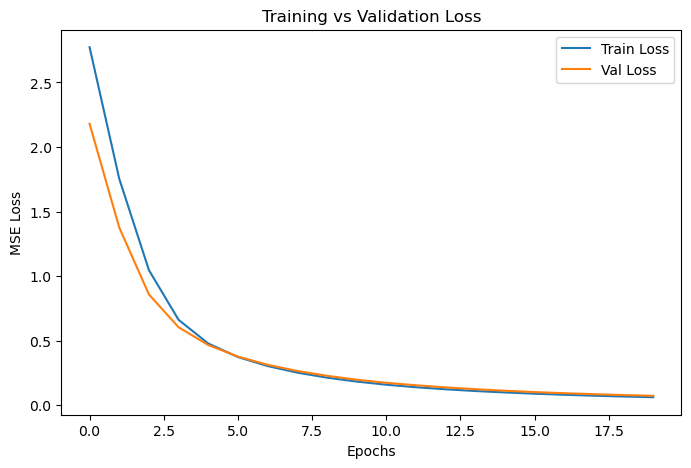

In [8]:
# --- Visualize Training ---
def plot_history(history):
  plt.figure(figsize=(8,5))
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Val Loss')
  plt.title("Training vs Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("MSE Loss")
  plt.legend()
  plt.show()

plot_history(history)

# **Example 2:** Multi-Class Classification (MNIST Digits)

In [28]:
#@title Classification Example (MNIST Digits)

# Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize (scale 0-255 pixel values to 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten images (28x28 → 784)
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)



In [ ]:
# Training Settings
n_input = X_train.shape[1]
n_output = len(np.unique(y_train)) # number of classes
_activation = 'relu' # sigmoid  Hidden Layers Activation
_epochs = 20
_batch_size = 32
# _batch_size = 64
# _batch_size = 16
_lr = 0.001
optimizer = Adam(learning_rate=_lr) # SGD(learning_rate=lr)

# Add early stopping
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)


# Build model
model = Sequential([
    Input(shape=(n_input,)),      # Explicit input layer
    #### Build Your Network
    Dense(128, activation=_activation),
    Dense(64, activation=_activation),
    Dense(32, activation=_activation),
    Dense(16, activation=_activation),
        Dense(n_output, activation='softmax')
])

# Compile
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train,
                    epochs=_epochs,
                    batch_size=_batch_size,
                    callbacks=[early_stopping],
                    validation_data=(X_test, y_test))

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
# 2m40s for 0.927acc without changing any settings
# 2m5s for 0.928acc 


Epoch 1/20
3750/3750 [==============================] - 36s 9ms/step - loss: 2.3692 - accuracy: 0.1109 - val_loss: 2.3052 - val_accuracy: 0.1135
Epoch 2/20
3750/3750 [==============================] - 32s 9ms/step - loss: 2.3033 - accuracy: 0.1121 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 3/20
3750/3750 [==============================] - 35s 9ms/step - loss: 2.3018 - accuracy: 0.1121 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 4/20
1846/3750 [=============>................] - ETA: 15s - loss: 2.3017 - accuracy: 0.1122

KeyboardInterrupt: 

so apparently this dataset is images with 28*28 pixels (784 pixels)
so this qualifies as a high complexity problem, image classification

Tariq says he would do
256 > 128 > 64 > 32 > 16


# Example 3: Regression with FCNN (California Housing)

In [31]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

latitude/longitude would be more useful if it could be broken up into neighborhoods instead
or even voting districts
but we're not interested in feature engineering today, so we'll ignore them

In [ ]:
# housing_clean = housing.drop("Latitude", axis=1)
# housing_clean = housing.drop("Longitude", axis=1)
# need to figure out how to drop columns with sklearn

X = housing_clean.data
y = housing_clean.target

print("Feature names:", list(X.columns))
print("Shape:", X.shape)

In [33]:
# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Standardize Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
# --- Define Neural Network ---
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # output layer for regression
])

# --- Compile Model ---
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

# --- Train Model ---
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
413/413 [==============================] - 5s 9ms/step - loss: 1.2705 - mae: 0.7875 - val_loss: 0.5871 - val_mae: 0.5439
Epoch 2/30
413/413 [==============================] - 3s 8ms/step - loss: 0.4828 - mae: 0.4942 - val_loss: 0.4626 - val_mae: 0.4748
Epoch 3/30
413/413 [==============================] - 2s 5ms/step - loss: 0.4195 - mae: 0.4573 - val_loss: 0.4297 - val_mae: 0.4625
Epoch 4/30
413/413 [==============================] - 3s 6ms/step - loss: 0.3869 - mae: 0.4413 - val_loss: 0.4117 - val_mae: 0.4473
Epoch 5/30
413/413 [==============================] - 1s 3ms/step - loss: 0.3733 - mae: 0.4336 - val_loss: 0.3994 - val_mae: 0.4495
Epoch 6/30
413/413 [==============================] - 2s 5ms/step - loss: 0.3618 - mae: 0.4262 - val_loss: 0.3885 - val_mae: 0.4400
Epoch 7/30
413/413 [==============================] - 3s 6ms/step - loss: 0.3536 - mae: 0.4196 - val_loss: 0.3866 - val_mae: 0.4321
Epoch 8/30
413/413 [==============================] - 3s 6ms/step - loss: 0.

Test MAE: 0.385


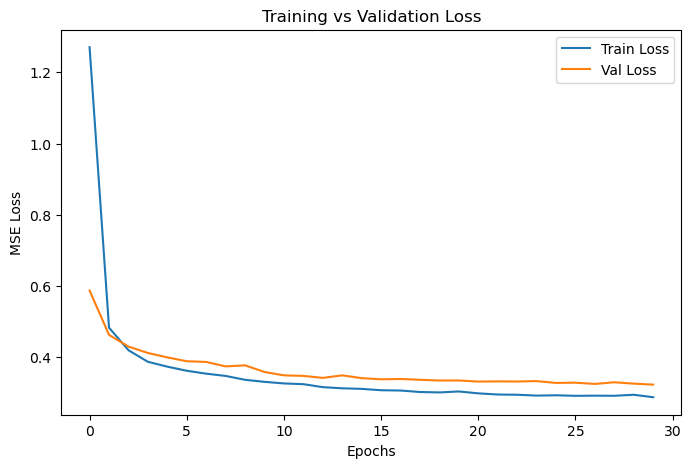

In [35]:
# --- Evaluate on Test Data ---
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test MAE: {test_mae:.3f}")

# --- Visualize Training History ---
plot_history(history)

# Example 4: Multi-output Regression (Energy Efficiency dataset)
Predicting several continuous variables simultaneously.

The dataset contains eight attributes (by X1...X8) and two outcomes (y1 and y2). The aim is to use the eight features to predict each of the two responses. Specifically:

```
- X1	Relative Compactness (a measure of a building's thermal efficiency)
- X2	Surface Area (m²)
- X3	Wall Area (m²)
- X4	Roof Area (m²)
- X5	Overall Height (m)
- X6	Orientation (2:North, 3:East, 4:South, 5:West)
- X7	Glazing Area ( 0%, 10%, 25%, 40% (of floor area))
- X8	Glazing Area Distribution (- 1:Uniform, 2:North, 3:East, 4:South, 5:West)
- y1	Heating Load (kWh/m²)
- y2	Cooling Load (kWh/m²)
```
![](https://ars.els-cdn.com/content/image/1-s2.0-S0306261923004385-gr1.jpg)

In [ ]:
import pandas as pd

df = pd.read_csv("energy_efficiency.csv")
df.head()

In [ ]:
df.describe()

In [ ]:
# Finding correlation between features and plotting them

plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), cbar = False, annot = True, fmt=".1f")

In [ ]:
X = df.drop(["Y1", 'Y2'], axis=1)
y = df.filter(["Y1", 'Y2'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

In [ ]:
# ----- Build neural network -----
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(Y_train.shape[1])  # 2 outputs, linear activation (default)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',           # Mean Squared Error for regression
    metrics=['mae']       # Mean Absolute Error
)
model.summary()

In [ ]:
# ----- Train -----
history = model.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)

# ----- Evaluate -----
loss, mae = model.evaluate(X_test, Y_test, verbose=0)
print(f"\nTest MAE: {mae:.3f}")

# ----- Predict -----
# preds = model.predict(X_test[:5])
# print("\nPredictions for first 5 buildings:")
# print(pd.DataFrame(preds, columns=y.columns))

# ----- Visualize -----
plot_history(history)

# Exercise: Update the netwrok Structure to achieve better performance

# **Homework:** Regression with Neural Networks

Dataset: Auto-MPG

The Auto-MPG dataset is a classic machine learning dataset that contains technical specifications of various car models, such as weight, horsepower, and engine displacement. It is commonly used to predict vehicle performance indicators.

**Task:**
Train a regression model using a neural network to predict the following target variables:
- mpg (miles per gallon – city-cycle fuel consumption)
- co2_emission
- engine_efficiency

In [2]:
import pandas as pd

df = pd.read_csv("./datasets/mpg.csv")
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,co2_emission,engine_efficiency
0,0,18.0,8,307.0,130.0,3504,12.0,70,usa,362.984260,34.246575
1,1,15.0,8,350.0,165.0,3693,11.5,70,usa,384.399234,31.139995
2,2,18.0,8,318.0,150.0,3436,11.0,70,usa,356.219776,32.013970
3,3,16.0,8,304.0,150.0,3433,12.0,70,usa,372.909735,34.954850
4,4,17.0,8,302.0,140.0,3449,10.5,70,usa,359.597628,30.443607


In [3]:
X = df.drop(["Unnamed: 0", "mpg", 'co2_emission', 'engine_efficiency', 'origin'], axis=1)
y = df.filter(["mpg", 'co2_emission', 'engine_efficiency'], axis=1)

In [4]:
y.head()

,mpg,co2_emission,engine_efficiency
0,18.0,362.984260,34.246575
1,15.0,384.399234,31.139995
2,18.0,356.219776,32.013970
3,16.0,372.909735,34.954850
4,17.0,359.597628,30.443607


# **Homework 2:** CDC Diabetes Health dataset (with NN)

Use the CDC Diabetes Health dataset to train a classification model using Neural Network. Your goal is to train a model that accurately classifies patients into:

- Yes = Diagnosed with diabetes
- No = Not diagnosed with diabetes

In [5]:
X_train = pd.read_csv("./datasets/kaggle1/X_train.csv")
y_train = pd.read_csv("./datasets/kaggle1/y_train.csv")
X_test = pd.read_csv("./datasets/kaggle1/X_test.csv")
Y_test = pd.read_csv("./datasets/kaggle1/y_test.csv")
X_train.head()

,ID,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,Gender
0,18165,1.0,1.0,1.0,30.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,12.0,6.0,6.0,Male
1,38450,1.0,0.0,1.0,33.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,4.0,0.0,10.0,5.0,7.0,Male
2,42473,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,8.0,6.0,2.0,Male
3,13478,0.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,8.0,5.0,6.0,Female
4,69265,1.0,1.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,5.0,1.0,10.0,4.0,1.0,Female
